In [1]:
import sys, os
sys.path.insert(0, os.path.join(".."))

# Example usage

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Import, and set to log to the console.  (See the console which is running
# Jupyter notebook for logging about HTTP requests.)
import tilemapbase
tilemapbase.start_logging()

In [4]:
# Don't need if you have run before; DB file will already exist.
tilemapbase.init(create=True)

In [5]:
# Use open street map
t = tilemapbase.tiles.OSM

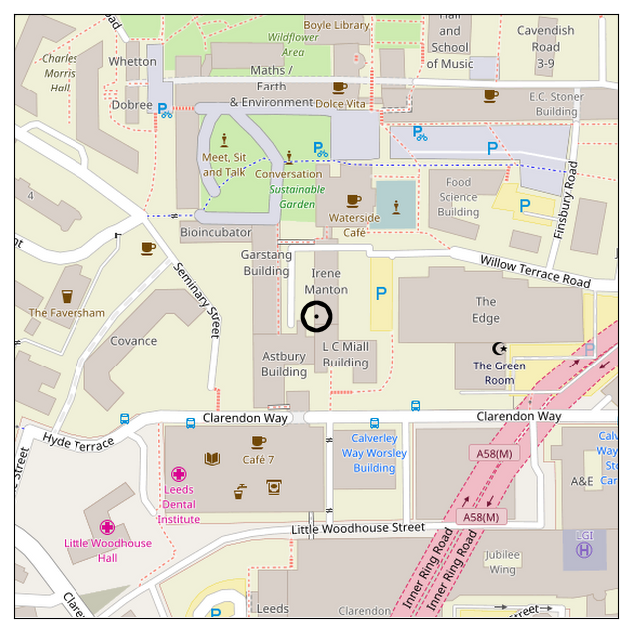

In [6]:
# My current office at the University of Leeds
my_office = (-1.554934, 53.804198)

degree_range = 0.003
extent = tilemapbase.extent(my_office[0] - degree_range, my_office[0] + degree_range,
                  my_office[1] - degree_range, my_office[1] + degree_range, 600, 600)

# On my desktop, DPI gets scaled by 0.75
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

extent.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

If you look closely at e.g. the "Maths / Earth & Environment" text, you'll see some distortion.  This appears to be a slight scaling issue leading to tiles overlapping.

To fix this, we can assemble the needed tiles using PIL and then display just one large image using `matplotlib`.

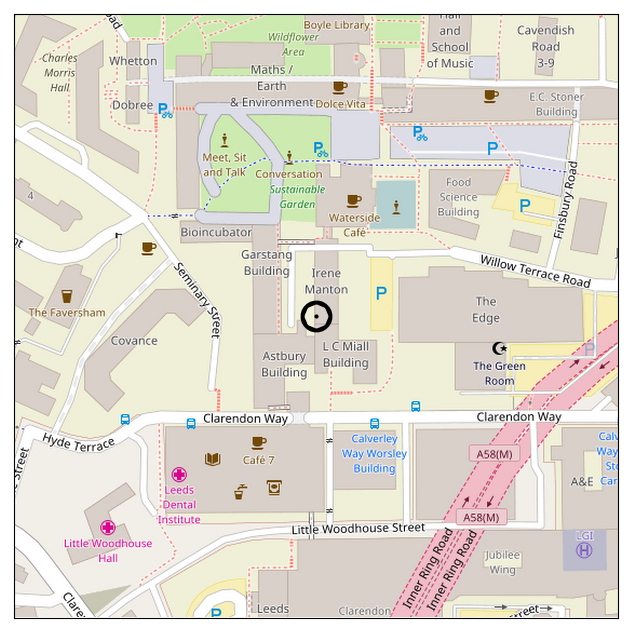

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

extent.plothq(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

When producing figures for printing, a higher resolutions might be appropriate.  This can be achieved by increasing the zoom level.  The figure could be saved as:

    fig.savefig("test.pdf", dpi=200)
    
This will transparently create a high-DPI PDF file.  (It is worth also saving a copy without the `dpi=200` and comparing the outputs.)

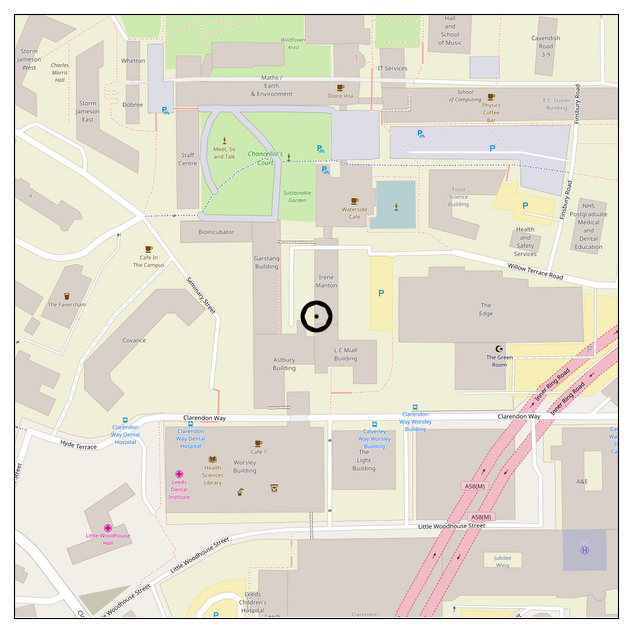

In [8]:
extent.zoom += 1
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

extent.plothq(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None